In [15]:
from melanoma_detection.preprocess_dataset import create_test_dataset, create_train_dataset, MelanomaDataset
from torch.utils.data import DataLoader
import torchvision.transforms as transforms

BATCH_SIZE = 4
EPOCHS = 5


# Imagenet normalization values
mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]

transform_train = transforms.Compose(
    [
        transforms.ColorJitter(brightness=0.0, contrast=0.2, saturation=0.5, hue=0.0),
        transforms.Resize((224, 224)),  # Resize the image to 224x224 pixels
        transforms.ToTensor(),
        transforms.Normalize(mean, std),
    ]
)

transform_validation = transforms.Compose(
    [
        transforms.Resize((224, 224)),  # Resize the image to 224x224 pixels
        transforms.ToTensor(),
        transforms.Normalize(mean, std),
    ]
)

train_loader = DataLoader(
    MelanomaDataset(
        create_train_dataset(), transform=transform_train
    ),
    BATCH_SIZE,
    shuffle=True,
    num_workers=5,
)

test_loader = DataLoader(
    MelanomaDataset(
        create_test_dataset(), transform=transform_validation
    ),
    BATCH_SIZE,
    shuffle=False,
    num_workers=5,
)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


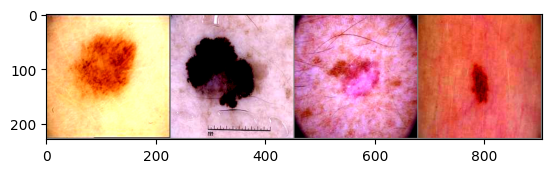

0.0 1.0 1.0 0.0


In [16]:
import torchvision
import numpy as np
import matplotlib.pyplot as plt

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(train_loader)
images, labels = dataiter.__next__()


imshow(torchvision.utils.make_grid(images))
print(' '.join(f'{labels[j]}' for j in range(BATCH_SIZE)))